In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/merge_test_labels.csv')
data

,Unnamed: 0,comment_text,num_words,length,unique_words,num_punctuations,num_symbols,num_stop_words,num_capitals,num_small,capital_proportions,small_proportions,Class Label
0,0,Explanation\nWhy the edits made under my usern...,47,264,45,6,0,15,17,186,6.439394,70.454545,non_toxic
1,1,D'aww! He matches this background colour I'm s...,18,112,18,5,0,2,8,65,7.142857,58.035714,non_toxic
2,2,"Hey man, I'm really not trying to edit war. It...",42,233,39,4,0,18,4,182,1.716738,78.111588,non_toxic
3,3,"""\nMore\nI can't make any real suggestions on ...",111,622,80,6,0,52,11,475,1.768489,76.366559,non_toxic
4,4,"You, sir, are my hero. Any chance you remember...",13,67,13,3,0,5,2,48,2.985075,71.641791,non_toxic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
159566,159566,""":::::And for the second time of asking, when ...",45,295,41,8,0,19,2,225,0.677966,76.271186,non_toxic
159567,159567,You should be ashamed of yourself \n\nThat is ...,21,99,21,4,0,9,2,64,2.020202,64.646465,non_toxic
159568,159568,"Spitzer \n\nUmm, theres no actual article for ...",11,81,11,3,0,2,4,59,4.938272,72.839506,non_toxic
159569,159569,And it looks like it was actually you who put ...,25,116,22,1,0,14,2,89,1.724138,76.724138,non_toxic


In [3]:
# Encode the data in order to do classification
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
attributes = data.columns
# Converting string labels into numbers.
encoded_data =[]
for i in attributes:
    encoded_data.append([])

for i in range(0,len(attributes)):
    # print(attributes[i])
    encoded_data[i]=le.fit_transform(data[attributes[i]].astype(str))
print("Encoded Data")
for i in range(0,len(encoded_data)):
    print(encoded_data[i])

Encoded Data
[    0     1 70683 ... 66189 66190 66192]
[ 72696  68357  79592 ... 122203  60035  31106]
[439 117 384 ...  26 195 284]
[1738  132 1449 ... 3837  176  985]
[380  89 322 ...  12 134 200]
[155 144 131 ... 115   1 168]
[0 0 0 ... 0 0 0]
[ 57 112  90 ... 112  46  13]
[110 592 415 ... 415 154 415]
[ 942 2916  902 ... 2849 3182  358]
[21248 22095  3840 ... 18750  3875  7302]
[ 8163  2259 27466 ... 12006 23277  7430]
[3 3 3 ... 3 3 3]


In [4]:
print(data.shape)
from sklearn.model_selection import KFold
indexes = data.index
attributes = data.columns

encoded_dataframe = pd.DataFrame(index=indexes)
# print(encoded_dataframe)
for i in range(0,len(encoded_data)):
    encoded_dataframe.insert(i, attributes[i], encoded_data[i], True)
# print(encoded_dataframe.shape)
# print(encoded_dataframe.loc[0])

# X = data.values[:, 0:13]#data of 0 to 44 attributes
# Y = data.values[:,13]   #data of class attribute
X_test = encoded_dataframe.values[:, 0:12]#data of 0 to 44 attributes
Y_test = encoded_dataframe.values[:,12]   #data of class attribute
print("Splitted data shape")
# print(X.shape)
# print(Y.shape)
print(X_test.shape)
print(Y_test.shape)

(159571, 13)
Splitted data shape
(159571, 12)
(159571,)


In [5]:
print("==================================================================")
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# plt.show()
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
depth_accuracy = []
depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
for i in depth:
    scores = []
    best_svr = SVR(kernel='rbf')
    cv = KFold(n_splits=5, random_state=42, shuffle=True)
    for train_index, test_index in cv.split(X_test):
#         print("Train Index: ", train_index, "\n")
#         print("Test Index: ", test_index)
        # print("Inside")
        x_train, x_test, y_train, y_test = X_test[train_index], X_test[test_index], Y_test[train_index], Y_test[test_index]
        clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 5000,
                               max_depth=i, min_samples_leaf=20)
        clf_gini.fit(x_train, y_train)
        y_pred = clf_gini.predict(x_test)
        scores+=[accuracy_score(y_test,y_pred)*100]
    mean_val = sum(scores)/len(scores)
    depth_accuracy.append(mean_val)
print("Accuracy Plots of Decision Tree :",depth_accuracy)
print("==================================================================")

Accuracy Plots of Decision Tree : [89.83211233000848, 89.83273899458626, 89.83148566543069, 89.83211223182828, 89.84840609993186, 89.84464607319309, 89.83273923021873, 89.85091295460342, 89.84025934260444, 89.837125764447, 89.8202055263062, 89.79263147980603, 89.78511130851221, 89.76443074909204, 89.76067066344515, 89.76004397923131, 89.75816390695381, 89.75503048588469, 89.74939032796026, 89.74939032796026, 89.74939032796026, 89.74939032796026, 89.74939032796026, 89.74939032796026, 89.74939032796026]


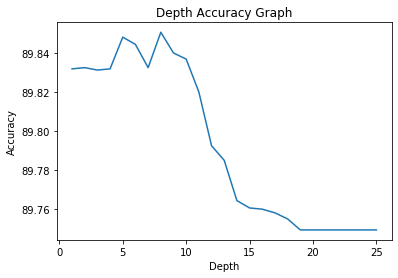

In [6]:
import matplotlib.pyplot as plt 
  

  
# plotting the points  
plt.plot(depth, depth_accuracy) 
  
# naming the x axis 
plt.xlabel('Depth') 
# naming the y axis 
plt.ylabel('Accuracy') 
  
# giving a title to my graph 
plt.title('Depth Accuracy Graph') 
  
# function to show the plot 
plt.show() 